<a href="https://www.kaggle.com/code/omarjfr/inception-pre-trained?scriptVersionId=160874934" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import tensorflow as tf
import glob as gb
from keras.layers import Conv2D, MaxPool2D,Dropout, Dense, Input, concatenate,GlobalAveragePooling2D, AveragePooling2D,Flatten
from tensorflow.keras.models import Model
import pandas as pd
import numpy as np
from tensorflow.keras import datasets,models,layers
import seaborn as sn
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import os,cv2
from sklearn.model_selection import train_test_split
from keras.applications import InceptionV3

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
path="../input/intel-image-classification/seg_train/"

In [3]:
os.listdir(path +'seg_train')

['mountain', 'street', 'buildings', 'sea', 'forest', 'glacier']

In [4]:
def getcode(n) : 
    for x , y in code.items() : 
        if n == y : 
            return x    

## Data Preparation 

In [5]:
code = {'buildings':0 ,'forest':1,'glacier':2,'mountain':3,'sea':4,'street':5}
X = []
y = []
for folder in  os.listdir(path +'seg_train') : 
    files = gb.glob(pathname= str( path +'seg_train//' + folder + '/*.jpg'))
    for file in files: 
        image = cv2.imread(file)
        image_array = cv2.resize(image , (96,96))
        X.append(list(image_array))
        y.append(code[folder])

## Visualize some images 

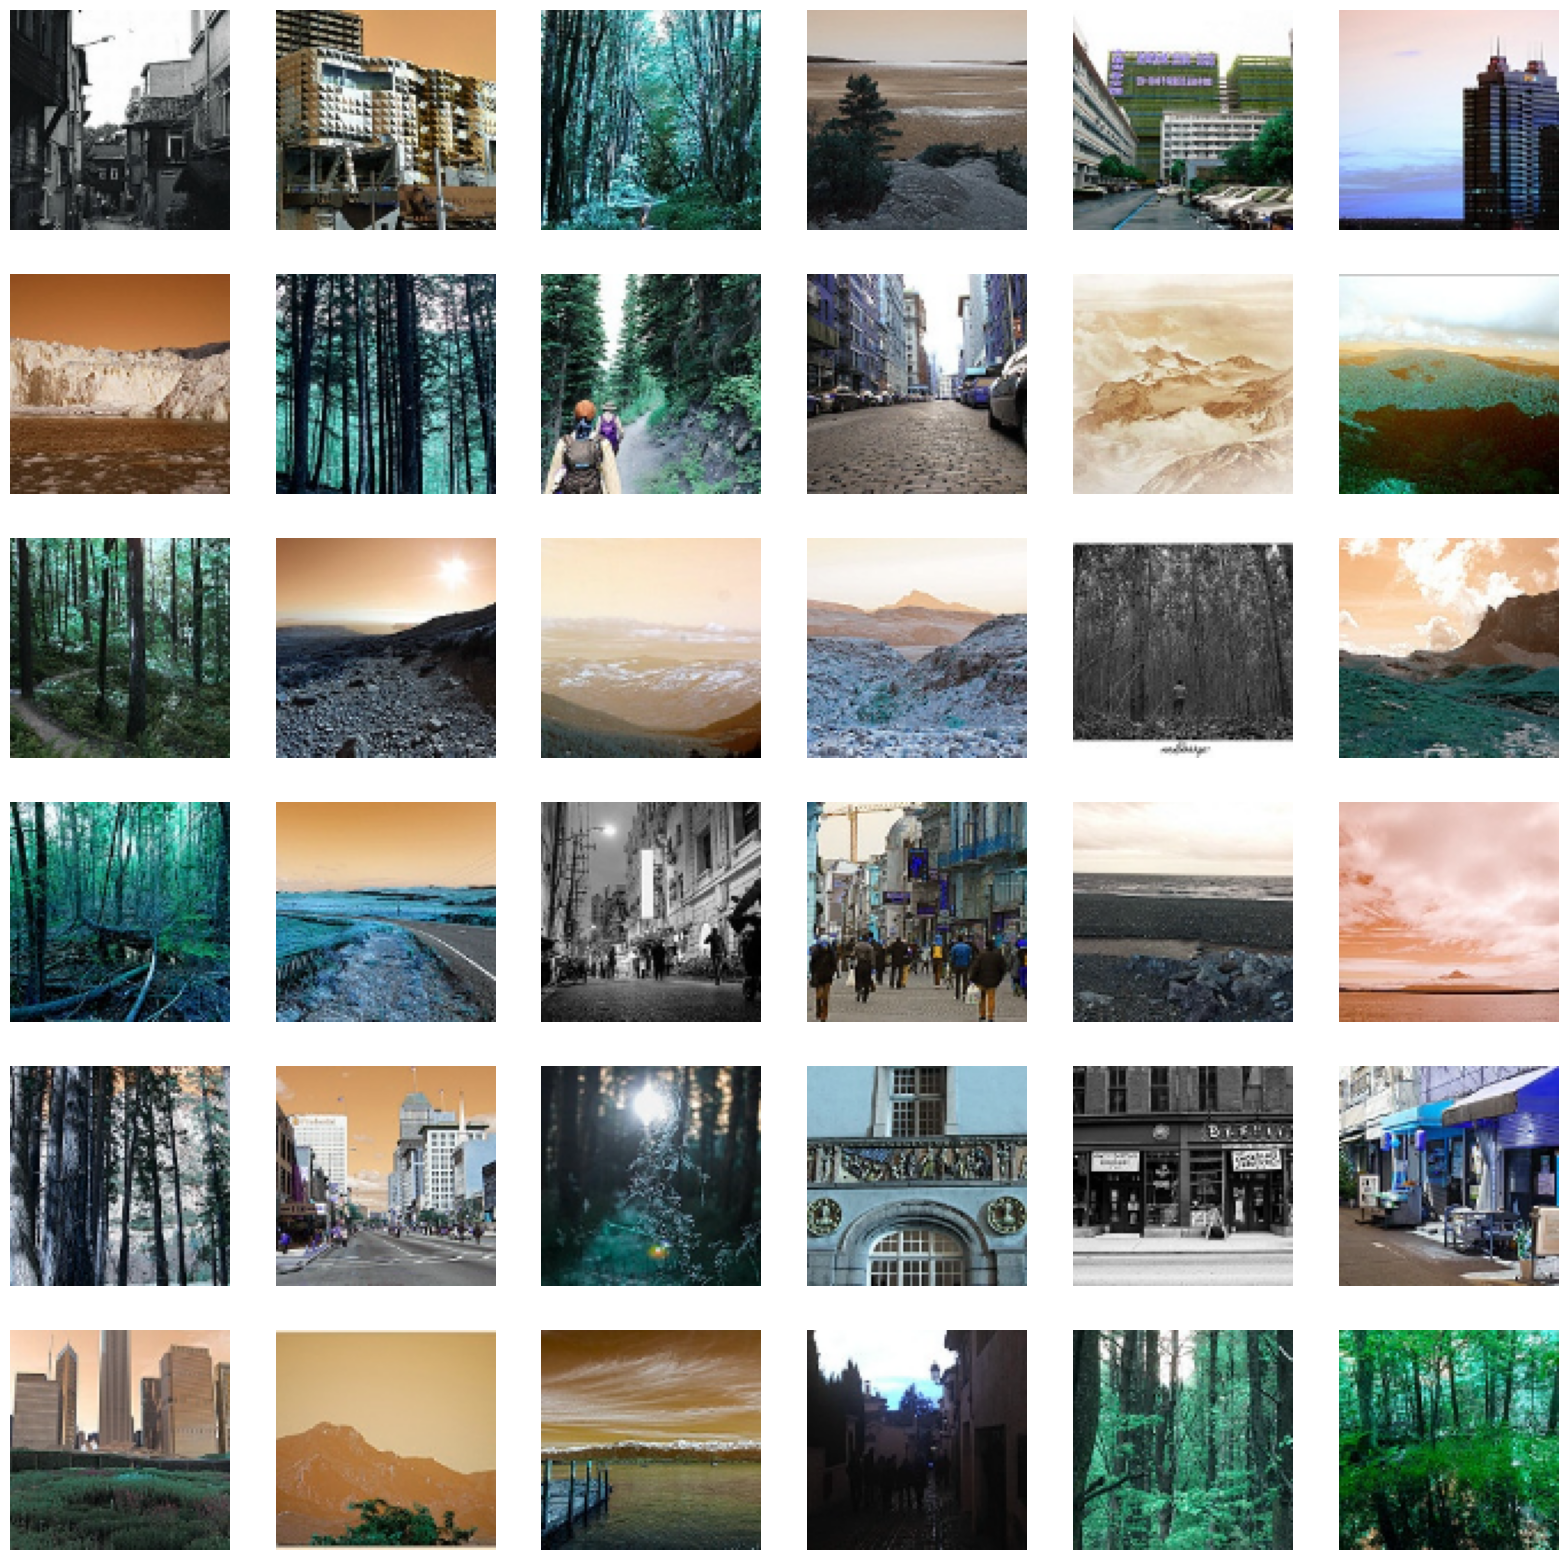

In [6]:
plt.figure(figsize=(20,20))
for n , i in enumerate(list(np.random.randint(0,len(X),36))) : 
    plt.subplot(6,6,n+1)
    plt.imshow(X[i])   
    plt.axis('off')
#     plt.title(getcode(y[i]))

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [8]:
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)
print(f'X_train shape  is {X_train.shape}')
print(f'X_test shape  is {X_test.shape}')
print(f'y_train shape  is {y_train.shape}')
print(f'y_test shape  is {y_test.shape}')

X_train shape  is (11227, 96, 96, 3)
X_test shape  is (2807, 96, 96, 3)
y_train shape  is (11227,)
y_test shape  is (2807,)


### Pretrained Model

In [9]:
num_classes=6
inc = InceptionV3(input_shape=(96,96,3),weights='imagenet',include_top=False)
x= layers.Flatten()(inc.output)
pred=layers.Dense(num_classes,activation="softmax")(x)
model=models.Model(inputs=inc.input,outputs=pred)

87910968/87910968 [==============================] - 0s 0us/step


In [10]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 96, 96, 3)]          0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 47, 47, 32)           864       ['input_1[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, 47, 47, 32)           96        ['conv2d[0][0]']              
 Normalization)                                                                                   
                                                                                                  
 activation (Activation)     (None, 47, 47, 32)           0         ['batch_normalization[0][0

In [11]:
model.compile(optimizer ='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [12]:
ThisModel = model.fit(X_train, y_train, epochs=10,validation_data=(X_test, y_test))

Epoch 1/10
351/351 [==============================] - 62s 68ms/step - loss: 0.9177 - accuracy: 0.7111 - val_loss: 703.7601 - val_accuracy: 0.3000
Epoch 2/10
351/351 [==============================] - 20s 56ms/step - loss: 0.7569 - accuracy: 0.7578 - val_loss: 9028.3096 - val_accuracy: 0.1788
Epoch 3/10
351/351 [==============================] - 20s 57ms/step - loss: 0.8053 - accuracy: 0.7400 - val_loss: 3.7845 - val_accuracy: 0.6922
Epoch 4/10
351/351 [==============================] - 20s 58ms/step - loss: 0.6260 - accuracy: 0.7938 - val_loss: 0.4958 - val_accuracy: 0.8219
Epoch 5/10
351/351 [==============================] - 21s 59ms/step - loss: 0.4910 - accuracy: 0.8383 - val_loss: 0.6387 - val_accuracy: 0.7855
Epoch 6/10
351/351 [==============================] - 20s 58ms/step - loss: 0.9014 - accuracy: 0.7039 - val_loss: 0.8226 - val_accuracy: 0.7000
Epoch 7/10
351/351 [==============================] - 20s 58ms/step - loss: 0.7596 - accuracy: 0.7421 - val_loss: 1.9053 - val_accu

### Classification Results

88/88 [==============================] - 3s 15ms/step


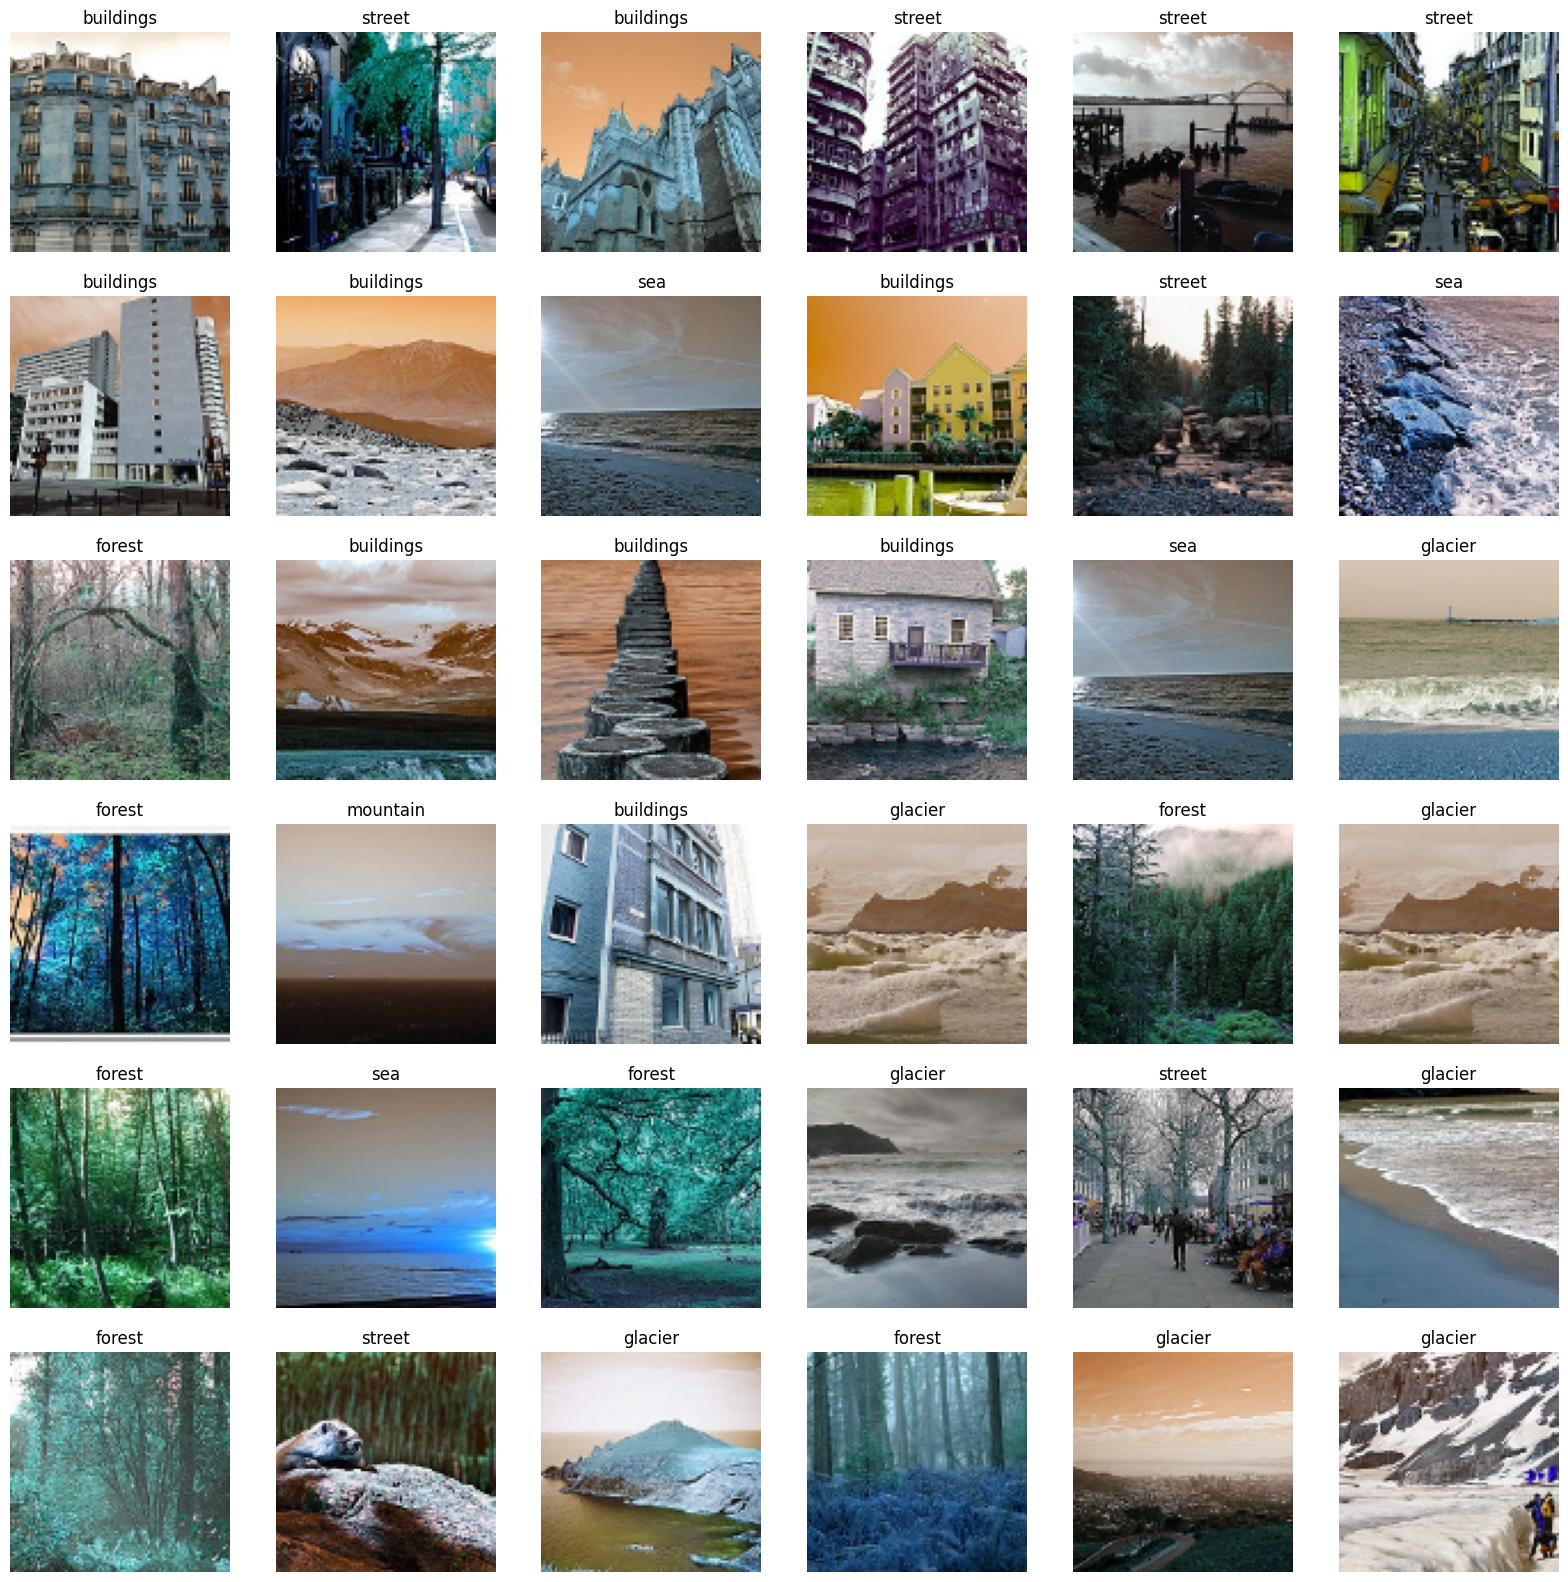

In [13]:
y_result = model.predict(X_test)
plt.figure(figsize=(20,20))
for n , i in enumerate(list(np.random.randint(0,len(X_test),36))) : 
    plt.subplot(6,6,n+1)
    plt.imshow(X_test[i])    
    plt.axis('off')
    plt.title(getcode(np.argmax(y_result[i])))